In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tqdm import tqdm
print("ggg")

ggg


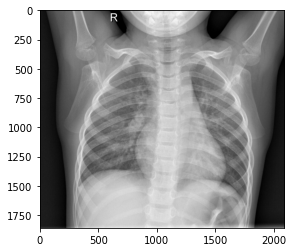

In [2]:
image = tf.keras.preprocessing.image.load_img("xraydata/NORMAL/0.jpeg")
plt.imshow(image)

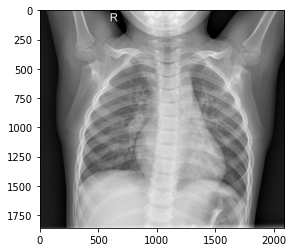

In [3]:
DATADIR = "xraydata/train/"
CATEGORIES = ["NORMAL","PNEUMONIA"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [4]:
print(img_array.shape)

(1858, 2090)


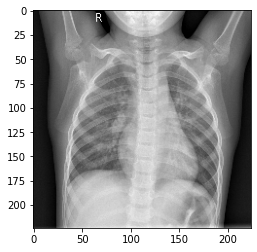

In [5]:
IMG_SIZE = 224

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e:  
                pass

create_training_data()

print(len(training_data))

100%|██████████| 3875/3875 [00:24<00:00, 160.47it/s]

5216


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print("training_data:",sample[1])

training_data: 1
training_data: 1
training_data: 1
training_data: 1
training_data: 1
training_data: 1
training_data: 0
training_data: 1
training_data: 0
training_data: 0


In [11]:
X = []
y = []
print(ggg)


ggg


In [12]:
print(len(training_data))

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)





5216


In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()


pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()
print(ggg)


ggg


In [14]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [15]:
X[1].shape

(224, 224, 1)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle






X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))


X = X/255.0
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:], padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()


model.compile(tf.keras.optimizers.Adam(learning_rate=0.00001),loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

callbacks1 = [
    EarlyStopping(monitor = 'loss', patience = 6), 
    ReduceLROnPlateau(monitor = 'loss', patience = 3), 
    ModelCheckpoint('../working/model.best3.hdf5',monitor='loss', save_best_only=True) 
]
history = model.fit(X,y,batch_size=64,epochs=30,validation_split=0.2)



model.save('64X3-CNN.model')
print("f")


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)            

In [11]:
from keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model
import os
import cv2

IMG_SIZE = 224
CATEGORIES = ["NORMAL","PNEUMONIA"]
dir_path = "xraydata/NORMAL/IM-0149-0001.jpeg"
dir_path2 = "xraydata/PNEUMONIA/person5_bacteria_19.jpeg"
dir_path3 = "xraydata/NORMAL/IM-0152-0001.jpeg"
dir_path4 = "xraydata/PNEUMONIA/person31_bacteria_164.jpeg"
dir_path5 = "xraydata/NORMAL/NORMAL2-IM-1094-0001-0002.jpeg"
dir_path6 = "xraydata/NORMAL/NORMAL2-IM-1333-0001.jpeg"
dir_path7 = "xraydata/PNEUMONIA/person1078_bacteria_3018.jpeg"
dir_path8 = "xraydata/ggg.jpg"
dir_path9 = "xraydata/ppp.jpg"
dir_path10 = "xraydata/images.jpg"
dir_path11 = "xraydata/hhh.jpg"
dir_path12 = "xraydata/denemelik.png"
def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

model = tf.keras.models.load_model("64X3-CNN.model")

prediction = model.predict([prepare(dir_path12)])
print(CATEGORIES[int(prediction[0][1])])

PNEUMONIA


In [18]:
from keras.models import load_model

model.save('seniorproject.h5')
print("saved")

saved


In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('seniorproject.tflite', 'wb') as f:
  f.write(tflite_model)

print("ggg")

INFO:tensorflow:Assets written to: C:\Users\anilh\AppData\Local\Temp\tmphtujod4g\assets
ggg


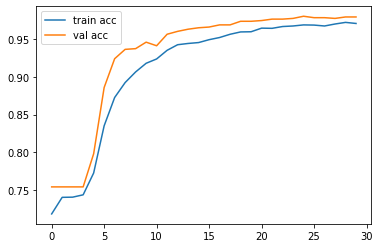

In [21]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')


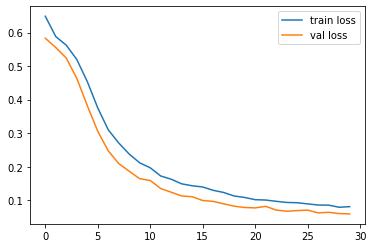

In [22]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()